# MasterClass - Cars


## Importujemy biblioteki

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from tqdm import tqdm
import helper as h

import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import eli5
import re

## Wczytujemy  i  łączymy 

In [2]:
df_train = pd.read_hdf("../input/df.train.h5")
df_train["price_value"] = df_train['price_value'].map(h.parse_price)

df_test = pd.read_hdf("../input/df.test.h5")

print(df_train.shape, df_test.shape)

(80129, 10) (80129, 7)


## `df` -  łączymy dane
W `helper` dodałem funkcję `get_df`. Cała nudna praca, którą wykonaliśmy w poprzednim notebooki jest tam zapisana.

In [3]:
df = h.get_df(df_train, df_test)

(160257, 86)


## Cechy kategorialne

In [4]:
cat_feats = [x for x in df.columns if "_cat" in x]
cat_feats

['Bezwypadkowy_cat',
 'Liczba miejsc_cat',
 'Kraj pochodzenia_cat',
 'Pojemność skokowa_cat',
 'Rodzaj paliwa_cat',
 'Skrzynia biegów_cat',
 'Możliwość finansowania_cat',
 'Pierwszy właściciel_cat',
 'Oferta od_cat',
 'Liczba drzwi_cat',
 'Przebieg_cat',
 'Moc_cat',
 'Metalik_cat',
 'Typ_cat',
 'Kolor_cat',
 'Model pojazdu_cat',
 'Stan_cat',
 'Kategoria_cat',
 'Serwisowany w ASO_cat',
 'Napęd_cat',
 'Leasing_cat',
 'Rok produkcji_cat',
 'Marka pojazdu_cat',
 'Faktura VAT_cat',
 'Pierwsza rejestracja_cat',
 'Zarejestrowany w Polsce_cat',
 'VAT marża_cat',
 'Wersja_cat',
 'VIN_cat',
 'Perłowy_cat',
 'Uszkodzony_cat',
 'Kod Silnika_cat',
 'Filtr cząstek stałych_cat',
 'Emisja CO2_cat',
 'Miesięczna rata_cat',
 'Liczba pozostałych rat_cat',
 'Opłata początkowa_cat',
 'Wartość wykupu_cat',
 'Akryl (niemetalizowany)_cat',
 'Tuning_cat',
 'Kierownica po prawej (Anglik)_cat',
 'Homologacja ciężarowa_cat',
 'Make_cat',
 'Metallic_cat',
 'Engine capacity_cat',
 'Version_cat',
 'VAT discount_cat'

## Check Log Model
Przepiszmy naszą funkcję walidacji i "przepuścimy" cenę przez logarytm `log`.

In [5]:
h.check_log_model(df, cat_feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (11051.872476848153, 311.19018814466676)


Weight,Feature
0.3143,Faktura VAT_cat
0.0886,Stan_cat
0.0731,Rok produkcji_cat
0.0702,Możliwość finansowania_cat
0.0676,Skrzynia biegów_cat
0.0507,Napęd_cat
0.0490,Serwisowany w ASO_cat
0.0341,Typ_cat
0.0266,Uszkodzony_cat
0.0236,Bezwypadkowy_cat


## Rok produkcji

In [6]:
df["year_production"] = df["Rok produkcji"].astype(int)
feats = ["year_production"] + cat_feats

In [7]:
h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9971.284857034767, 232.1370548676018)


Weight,Feature
0.3857,year_production
0.1660,Napęd_cat
0.0426,Skrzynia biegów_cat
0.0414,Uszkodzony_cat
0.0341,Serwisowany w ASO_cat
0.0253,Bezwypadkowy_cat
0.0243,Typ_cat
0.0218,Faktura VAT_cat
0.0209,Kierownica po prawej (Anglik)_cat
0.0207,Perłowy_cat


In [8]:
pd.crosstab(df.year_production, df.Year)

Year,-1,1989,1992,1995,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
year_production,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,0,1,1,2,2,1,1,2,2,4,2,7,5,7,12,9,4,12,6,6,7,8,4,4,15,4
1929,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1930,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1931,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1932,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,8682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015,6424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016,7153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df[ df.year_production == -1 ][["year_production", "Year"]]

,year_production,Year
314,-1,2006
466,-1,2012
601,-1,2007
3214,-1,2014
3543,-1,2007
...,...,...
143347,-1,2005
148522,-1,2017
149537,-1,2008
155387,-1,2017


In [10]:
df["year_production_ext"] = df.apply(lambda x: x["year_production"] if x["year_production"] != -1 else int(x["Year"]), axis=1)

In [11]:
df[ df["year_production_ext"] == -1 ].shape

(0, 164)

In [12]:
feats = ["year_production_ext"] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9911.932324863761, 322.6464072280516)


Weight,Feature
0.4031,year_production_ext
0.1644,Napęd_cat
0.0441,Serwisowany w ASO_cat
0.0409,Skrzynia biegów_cat
0.0347,Uszkodzony_cat
0.0343,Typ_cat
0.0256,Faktura VAT_cat
0.0227,Kierownica po prawej (Anglik)_cat
0.0224,Bezwypadkowy_cat
0.0158,Stan_cat


## Wersja

In [13]:
df["Wersja"]

0                      -1
1                      -1
2           H (2004-2014)
3          B8 (2007-2015)
4             Mk7 (2008-)
               ...       
160245     B7 (2010-2014)
160246         II (2014-)
160247      I (2002-2010)
160251                 -1
160254    III (2001-2006)
Name: Wersja, Length: 160257, dtype: object

In [14]:
df["version_years"] = df["Wersja"].map(lambda x: re.findall(r'(\d+)-(\d+)?', str(x)) )

df["version_year_from"] = df["version_years"].map(lambda x: x[0][0] if x else -1).astype(int)
df["version_year_to"] = df["version_years"].map(lambda x: x[0][1] if x and x[0][1] != "" else -1).astype(int)

df[ ["version_year_from", "version_year_to"] ]

,version_year_from,version_year_to
0,-1,-1
1,-1,-1
2,2004,2014
3,2007,2015
4,2008,-1
...,...,...
160245,2010,2014
160246,2014,-1
160247,2002,2010
160251,-1,-1


In [15]:
feats = ["version_year_from",
         "version_year_to",
         "year_production_ext"] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9789.883478311904, 304.1793896614196)


Weight,Feature
0.4207,year_production_ext
0.1605,Napęd_cat
0.0432,Skrzynia biegów_cat
0.0364,Serwisowany w ASO_cat
0.0297,Uszkodzony_cat
0.0268,Typ_cat
0.0257,Faktura VAT_cat
0.0226,Bezwypadkowy_cat
0.0197,Kierownica po prawej (Anglik)_cat
0.0145,Perłowy_cat


In [16]:
df["version_years_en"] = df["Version"].map(lambda x: re.findall(r'(\d+)-(\d+)?', str(x)) )

df["version_year_from_en"] = df["version_years_en"].map(lambda x: x[0][0] if x else -1).astype(int)
df["version_year_to_en"] = df["version_years_en"].map(lambda x: x[0][1] if x and x[0][1] != "" else -1).astype(int)

In [17]:
df["version_year_from_ext"] = df.apply(lambda x: x["version_year_from"] if x["version_year_from"] != -1 else int(x["version_year_from_en"]), axis=1)

In [18]:
df["version_year_to_ext"] = df.apply(lambda x: x["version_year_to"] if x["version_year_to"] != -1 else int(x["version_year_to_en"]), axis=1)

In [19]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext"] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9803.502814798772, 233.88919680115313)


Weight,Feature
0.4265,year_production_ext
0.1555,Napęd_cat
0.0441,Skrzynia biegów_cat
0.0323,Serwisowany w ASO_cat
0.0309,Uszkodzony_cat
0.0274,Typ_cat
0.0239,Faktura VAT_cat
0.0211,Kierownica po prawej (Anglik)_cat
0.0203,Bezwypadkowy_cat
0.0160,Marka pojazdu_cat


## Przebieg

In [20]:
def przebieg(x):
    if x == -1: return x
    
    return x.replace('km','').replace(' ','')

In [21]:
df['mileage'] = df['Przebieg'].map(przebieg).astype(int)

In [22]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9701.970375365183, 224.91852316464727)


Weight,Feature
0.4663,year_production_ext
0.1239,Napęd_cat
0.0410,Skrzynia biegów_cat
0.0363,Serwisowany w ASO_cat
0.0283,Uszkodzony_cat
0.0273,Bezwypadkowy_cat
0.0244,Typ_cat
0.0218,Faktura VAT_cat
0.0195,Kierownica po prawej (Anglik)_cat
0.0166,Perłowy_cat


In [23]:
df['mileage_en'] = df['Mileage'].map(przebieg).astype(int)

In [24]:
df["mileage_ext"] = df.apply(lambda x: x["mileage"] if x["mileage"] != -1 else x["mileage_en"], axis=1)

In [25]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9721.047366674466, 225.7333626802439)


Weight,Feature
0.3924,year_production_ext
0.1357,Napęd_cat
0.0671,Serwisowany w ASO_cat
0.0449,Skrzynia biegów_cat
0.0345,Faktura VAT_cat
0.0343,Bezwypadkowy_cat
0.0317,Uszkodzony_cat
0.0296,Typ_cat
0.0242,Kierownica po prawej (Anglik)_cat
0.0135,Marka pojazdu_cat


## Pojemność skokowa

In [26]:
df["engine_capacity"] = df["Pojemność skokowa"].map(lambda x: str(x).split("cm3")[0].replace(" ", "")).astype(int)

In [27]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9075.19160054703, 237.54953020132993)


Weight,Feature
0.3773,year_production_ext
0.1606,Napęd_cat
0.1134,Skrzynia biegów_cat
0.0306,engine_capacity
0.0305,Uszkodzony_cat
0.0273,Bezwypadkowy_cat
0.0254,Kierownica po prawej (Anglik)_cat
0.0223,Serwisowany w ASO_cat
0.0212,Faktura VAT_cat
0.0177,mileage_ext


In [28]:
df["engine_capacity_en"] = df["Engine capacity"].map(lambda x: str(x).split("cm3")[0].replace(" ", "")).astype(int)

In [29]:
df["engine_capacity_ext"] = df.apply(lambda x: x["engine_capacity"] if x["engine_capacity"] != -1 else x["engine_capacity_en"], axis=1)

In [30]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (9029.526079275343, 206.2487167479495)


Weight,Feature
0.3391,year_production_ext
0.1982,Napęd_cat
0.1022,Skrzynia biegów_cat
0.0382,Serwisowany w ASO_cat
0.0343,engine_capacity_ext
0.0342,Uszkodzony_cat
0.0317,Kierownica po prawej (Anglik)_cat
0.0267,Bezwypadkowy_cat
0.0187,mileage_ext
0.0182,Typ_cat


## Moc

In [31]:
df["power"] = df["Moc"].map(lambda x: str(x).split("KM")[0].replace(" ", "")).astype(int)

In [32]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8392.497432304037, 223.18036401185662)


Weight,Feature
0.4357,year_production_ext
0.1118,Skrzynia biegów_cat
0.1010,power
0.0783,Napęd_cat
0.0277,Uszkodzony_cat
0.0241,Bezwypadkowy_cat
0.0202,mileage_ext
0.0181,engine_capacity_ext
0.0177,Kierownica po prawej (Anglik)_cat
0.0156,Typ_cat


In [33]:
df["power_en"] = df["Engine power"].map(lambda x: str(x).split("HP")[0].replace(" ", "")).astype(int)

In [34]:
df['power_ext'] = df.apply(lambda x: x["power"] if x["power"] != -1 else x["power_en"], axis=1)

In [35]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage',
         'engine_capacity_ext',
         'power_ext'] + cat_feats


h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8402.35885225127, 195.38688090638922)


Weight,Feature
0.4213,year_production_ext
0.0885,power_ext
0.0862,Skrzynia biegów_cat
0.0816,Napęd_cat
0.0421,Serwisowany w ASO_cat
0.0282,Uszkodzony_cat
0.0247,Faktura VAT_cat
0.0219,Bezwypadkowy_cat
0.0201,mileage
0.0180,engine_capacity_ext


### Voivodeships

In [36]:
list_voivod = ['dolnośląskie',
'kujawsko-pomorskie',
'lubelskie',
'lubuskie',
'łódzkie',
'małopolskie',
'mazowieckie',
'opolskie',
'podkarpackie',
'podlaskie',
'pomorskie',
'śląskie',
'świętokrzyskie',
'warmińsko-mazurskie',
'wielkopolskie',
'zachodniopomorskie']

In [37]:
def voiv(x):
    for void in list_voivod:
        if void in x.casefold():
            return void

In [38]:
df['voivodeship']= df['seller_address'].map(voiv)

In [39]:
df['voivodeship']

0         warmińsko-mazurskie
1                 mazowieckie
2                    opolskie
3                    opolskie
4                    opolskie
                 ...         
160245               opolskie
160246              pomorskie
160247                śląskie
160251     kujawsko-pomorskie
160254            mazowieckie
Name: voivodeship, Length: 160257, dtype: object

In [40]:
df['voivodeship_cat'] = df['voivodeship'].map(lambda x: x).factorize()[0]
df['voivodeship_cat']

0          0
1          1
2          2
3          2
4          2
          ..
160245     2
160246     4
160247     5
160251    10
160254     1
Name: voivodeship_cat, Length: 160257, dtype: int64

In [41]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power_ext',
         'voivodeship_cat'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8353.867442858545, 154.64900631441142)


Weight,Feature
0.4093,year_production_ext
0.0908,Skrzynia biegów_cat
0.0856,power_ext
0.0839,Napęd_cat
0.0522,Faktura VAT_cat
0.0284,Serwisowany w ASO_cat
0.0261,Bezwypadkowy_cat
0.0257,Uszkodzony_cat
0.0196,mileage_ext
0.0181,engine_capacity_ext


### Postal code

In [42]:
list(df.seller_address)

['ŁUKASIEWICZA 1 - 19-300 Ełk, ełcki, Warmińsko-mazurskie (Polska)',
 'MODLIŃSKA 154 B - 03-170 Warszawa, Mazowieckie (Polska)',
 'Ruchocinek 63c - 62-230 Witkowo, gnieźnieński, Wielkopolskie (Polska)',
 'Chróścice, opolski, Opolskie',
 'Trzeboszowice, nyski, Opolskie',
 'Pruchnik, jarosławski, Podkarpackie',
 'Gdynia, Pomorskie, Chwarzno-Wiczlino',
 'Czechowice-Dziedzice, bielski, Śląskie',
 'Zgierz, zgierski, Łódzkie',
 'Gutowo Wielkie 3 - 62-300 Września, wrzesiński, Wielkopolskie (Polska)',
 'ul. Rybna 65 (przy trasie Wrocław-Jelenia Góra) - 58-150 Strzegom, świdnicki, Dolnośląskie (Polska)',
 'ul. Krasnobrodzka 5 - 03-214 Warszawa, Targówek (Polska)',
 'SALON AUTO WIM,UL.SUWALSKA 64, 19-300 EŁK - 19-300 Ełk, ełcki, Warmińsko-mazurskie (Polska)',
 'Sosnowiec, Śląskie',
 'Białogórska 1 - 35-304 Rzeszów, Podkarpackie (Polska)',
 'Estrady 14 - 05-082 Klaudyn, warszawski zachodni, Mazowieckie (Polska)',
 'ul. Ptasia 4 - 60-319 Poznań, Grunwald (Polska)',
 'Ustowo 56, Dealer - 70-001 Sz

In [43]:
re.findall(r'\d{2}-\d{3}', 'ŁUKASIEWICZA 1 - 19-300 Ełk, ełcki, Warmińsko-mazurskie (Polska)')

['19-300']

In [44]:
df['seller_address'].map(lambda x: re.findall(r'\d{2}-\d{3}', str(x)))

0         [19-300]
1         [03-170]
2         [62-230]
3               []
4               []
            ...   
160245          []
160246    [78-100]
160247    [43-300]
160251          []
160254    [26-600]
Name: seller_address, Length: 160257, dtype: object

In [45]:
df['postal_code'] = df['seller_address'].map(lambda x: re.findall(r'\d{2}-\d{3}', str(x)))

In [46]:
df['postal_code_cat'] = df['postal_code'].map(lambda x: str(x)).factorize()[0]
df['postal_code_cat']

0            0
1            1
2            2
3            3
4            3
          ... 
160245       3
160246    1087
160247     245
160251       3
160254      89
Name: postal_code_cat, Length: 160257, dtype: int64

In [47]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power_ext',
         'voivodeship_cat',
         'postal_code_cat'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8388.883832565452, 214.21835320613818)


Weight,Feature
0.3960,year_production_ext
0.1090,Skrzynia biegów_cat
0.0853,power_ext
0.0749,Napęd_cat
0.0529,Serwisowany w ASO_cat
0.0321,Faktura VAT_cat
0.0254,Uszkodzony_cat
0.0213,Bezwypadkowy_cat
0.0192,engine_capacity_ext
0.0185,mileage_ext


In [83]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power',
         'voivodeship_cat'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.1, random_state=0))

Final result: (6364.031785669014, 205.16459894604682)


Weight,Feature
0.3738,year_production_ext
0.1095,Napęd_cat
0.1009,power
0.0513,Skrzynia biegów_cat
0.0430,Kierownica po prawej (Anglik)_cat
0.0298,Uszkodzony_cat
0.0293,Zarejestrowany jako zabytek_cat
0.0175,Liczba pozostałych rat_cat
0.0168,Marka pojazdu_cat
0.0155,engine_capacity_ext


# FINAL - Kaggle submit

In [ ]:
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat'] + cat_feats

# h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.1, random_state=0))

In [ ]:
# feats = ["version_year_from_ext"] + ["version_year_to_ext"] + ["year_production_ext"] + ['mileage_ext'] + ['engine_capacity_ext'] + ['power_ext'] + ['voivodeship_cat'] + cat_feats
# h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.1, random_state=0))

## Experiments

In [ ]:
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat',
#          'postal_code_cat'] + cat_feats

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=6, n_estimators=en, learning_rate=0.1, random_state=0))

In [ ]:
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat',
#          'postal_code_cat'] + cat_feats

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=en, learning_rate=0.1, random_state=0))

In [ ]:
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat',
#          'postal_code_cat'] + cat_feats

# en_est = [1000]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=en, learning_rate=0.1, random_state=0))

In [52]:
# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=10, n_estimators=en, learning_rate=0.3, random_state=0))
    
# Final result: (7029.884752965164, 149.06715109677134)
# Final result: (7029.452654021914, 149.00855029865053)
# Final result: (7030.705156347487, 148.9745814175913)
# Final result: (7030.705156347487, 148.9745814175913)
# Final result: (7030.705156347487, 148.9745814175913)
# Final result: (7030.705156347487, 148.9745814175913)


# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=8, n_estimators=en, learning_rate=0.3, random_state=0))
    
# Final result: (6903.350977463221, 176.90957982281358)
# Final result: (6897.602639825086, 180.65755590207135)
# Final result: (6897.338715411342, 181.97508009259272)
# Final result: (6897.272785144056, 182.0639768404209)
# Final result: (6898.1542361829925, 181.26906223138047)
# Final result: (6899.648706750575, 180.48488841157618)


# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=en, learning_rate=0.3, random_state=0))

# Final result: (6842.260348329748, 195.3956089813725)
# Final result: (6826.117062316296, 196.798594959691)
# Final result: (6817.644040204856, 197.74993902596668)
# Final result: (6818.749888863726, 201.4322638673661)
# Final result: (6820.696738159744, 199.7294698867356)
# Final result: (6818.82025486589, 199.82503005364003)

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=6, n_estimators=en, learning_rate=0.3, random_state=0))
    
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat',
#          'postal_code_cat'] + cat_feats

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=8, n_estimators=en, learning_rate=0.3, random_state=0))
    
# Final result: (6831.741613005301, 154.33099196368065)
# Final result: (6796.023698438311, 147.82158841906846)
# Final result: (6784.234025809326, 146.64728868901054)
# Final result: (6783.572354962581, 144.02380957628984)
# Final result: (6789.705941682159, 145.13270214777802)
# Final result: (6790.109040104359, 142.4246835576644)

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=en, learning_rate=0.3, random_state=0))

# Final result: (6859.096586489199, 204.08727274111723)
# Final result: (6773.858958836974, 212.8204724496877)
# Final result: (6733.449716927015, 208.9315545233402)
# Final result: (6710.984841783806, 210.46635875787842)
# Final result: (6706.020695533606, 213.50268530768213)
# Final result: (6698.6336682868205, 220.89224542593294)

# en_est = [500, 700, 900, 1100, 1200, 1300 ]

# for en in en_est:
#     h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=en, learning_rate=0.1, random_state=0))
    
# Final result: (7052.394528669176, 165.98509397815695)
# Final result: (6854.534604668795, 145.94049127396912)
# Final result: (6724.213486470685, 148.69798210794815)
# Final result: (6641.745948655642, 158.19524572614804)
# Final result: (6611.844279173265, 154.96187920708203)
# Final result: (6582.209952283757, 155.1302012107611)

## Features

In [53]:
df['features'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,ABS,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alufelgi,Czujnik deszczu,ESP (stabilizacja toru jazdy),Isofix,Komputer pokładowy,MP3,Poduszki boczne przednie,Światła do jazdy dziennej,Tempomat,System Start-Stop,Centralny zamek,Immobilizer,Radio fabryczne,ASR (kontrola trakcji),Czujnik zmierzchu,Gniazdo AUX,Kamera cofania,Kurtyny powietrzne,Nawigacja GPS,Przyciemniane szyby,Światła przeciwmgielne,Wielofunkcyjna kierownica,Światła LED,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,Bluetooth,Czujniki parkowania tylne,Gniazdo USB,Klimatyzacja automatyczna,Łopatki zmiany biegów,Podgrzewane lusterka boczne,Relingi dachowe,Tapicerka welurowa,Ogranicznik prędkości,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABS,ASR (kontrola trakcji),Elektryczne szyby przednie,ESP (stabilizacja toru jazdy),Isofix,Kurtyny powietrzne,Poduszki boczne przednie,Tempomat,Alarm,CD,Elektryczne szyby tylne,Gniazdo USB,Klimatyzacja automatyczna,Poduszka powietrzna kierowcy,Radio fabryczne,Wielofunkcyjna kierownica,Alufelgi,Centralny zamek,Elektrycznie ustawiane lusterka,Immobilizer,Komputer pokładowy,Poduszka powietrzna pasażera,Światła przeciwmgielne,Wspomaganie kierownicy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABS,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,ASR (kontrola trakcji),Elektrochromatyczne lusterka boczne,Klimatyzacja automatyczna,MP3,Poduszki boczne tylne,Wielofunkcyjna kierownica,CD,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alarm,Czujnik deszczu,Elektrochromatyczne lusterko wsteczne,Komputer pokładowy,Podgrzewane lusterka boczne,Tapicerka welurowa,Centralny zamek,Immobilizer,Radio fabryczne,Alufelgi,Czujniki parkowania tylne,ESP (stabilizacja toru jazdy),Kurtyny powietrzne,Poduszki boczne przednie,Tempomat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABS,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,Czujnik deszczu,Elektrycznie ustawiane fotele,Klimatyzacja automatyczna,MP3,Podgrzewane przednie siedzenia,Światła do jazdy dziennej,Światła Xenonowe,Wielofunkcyjna kierownica,CD,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alufelgi,Czujnik zmierzchu,ESP (stabilizacja toru jazdy),Komputer pokładowy,Nawigacja GPS,Poduszki boczne przednie,Światła LED,Tapicerka welurowa,Zmieniarka CD,Centralny zamek,Immobilizer,Radio fabryczne,ASR (kontrola trakcji),Elektryczne szyby tylne,Isofix,Kurtyny powietrzne,Podgrzewane lusterka boczne,Poduszki boczne tylne,Światła przeciwmgielne,Tempomat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,ASR (kontrola trakcji),Gniazdo AUX,Komputer pokładowy,Tapicerka welurowa,CD,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alarm,Elektrochromatyczne lusterko wsteczne,Isofix,Podgrzewane lusterka boczne,Wielofunkcyjna kierownica,Centralny zamek,Immobilizer,Radio fabryczne,Alufelgi,ESP (stabilizacja toru jazdy),Klimatyzacja manualna,Przyciemniane szyby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [54]:
features =(
        df['features']
        .map(lambda x: x[:40])
        .map(lambda x: {"features_{}".format(idx):val for idx,val in enumerate(x)})
        .apply(pd.Series))

In [55]:
features = features.fillna(-1)

In [56]:
features_feats = features.columns
features_feats

Index(['features_0', 'features_1', 'features_2', 'features_3', 'features_4',
       'features_5', 'features_6', 'features_7', 'features_8', 'features_9',
       'features_10', 'features_11', 'features_12', 'features_13',
       'features_14', 'features_15', 'features_16', 'features_17',
       'features_18', 'features_19', 'features_20', 'features_21',
       'features_22', 'features_23', 'features_24', 'features_25',
       'features_26', 'features_27', 'features_28', 'features_29',
       'features_30', 'features_31', 'features_32', 'features_33',
       'features_34', 'features_35', 'features_36', 'features_37',
       'features_38', 'features_39'],
      dtype='object')

In [57]:
for feat in features_feats:
    features["{}_cat".format(feat)] = features[feat].factorize()[0]

In [58]:
features.sample(5)

,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25,features_26,features_27,features_28,features_29,features_30,features_31,features_32,features_33,features_34,features_35,features_36,features_37,features_38,features_39,features_0_cat,features_1_cat,features_2_cat,features_3_cat,features_4_cat,features_5_cat,features_6_cat,features_7_cat,features_8_cat,features_9_cat,features_10_cat,features_11_cat,features_12_cat,features_13_cat,features_14_cat,features_15_cat,features_16_cat,features_17_cat,features_18_cat,features_19_cat,features_20_cat,features_21_cat,features_22_cat,features_23_cat,features_24_cat,features_25_cat,features_26_cat,features_27_cat,features_28_cat,features_29_cat,features_30_cat,features_31_cat,features_32_cat,features_33_cat,features_34_cat,features_35_cat,features_36_cat,features_37_cat,features_38_cat,features_39_cat
31259,Immobilizer,Wspomaganie kierownicy,Poduszka powietrzna kierowcy,Tapicerka welurowa,Poduszka powietrzna pasażera,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,13,22,2,26,37,16,14,16,17,17,15,16,16,7,7,6,8,8,9,6,6,6,5,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
107591,ABS,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,Bluetooth,Czujniki parkowania przednie,Elektrochromatyczne lusterko wsteczne,ESP (stabilizacja toru jazdy),Komputer pokładowy,Nawigacja GPS,Podgrzewane przednie siedzenia,Relingi dachowe,Światła przeciwmgielne,Tempomat,CD,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alufelgi,Czujnik deszczu,Czujniki parkowania tylne,Elektryczne szyby tylne,Klimatyzacja czterostrefowa,Kurtyny powietrzne,Podgrzewana przednia szyba,Przyciemniane szyby,Szyberdach,Światła Xenonowe,Wielofunkcyjna kierownica,Centralny zamek,Immobilizer,Radio fabryczne,ASR (kontrola trakcji),Czujnik zmierzchu,Elektrochromatyczne lusterka boczne,Elektrycznie ustawiane fotele,Klimatyzacja manualna,MP3,Podgrzewane lusterka boczne,Regulowane zawieszenie,Światła do jazdy dziennej,0,2,2,2,14,18,19,19,8,29,41,26,6,36,20,17,19,40,44,20,20,67,25,54,15,62,33,40,23,26,24,44,27,50,23,48,10,20,33,13
2978,ABS,Elektryczne szyby przednie,Poduszka powietrzna kierowcy,Wspomaganie kierownicy,ASR (kontrola trakcji),Czujniki parkowania tylne,Gniazdo AUX,MP3,Poduszki boczne przednie,Światła przeciwmgielne,CD,Elektrycznie ustawiane lusterka,Poduszka powietrzna pasażera,Alarm,Czujnik deszczu,Elektryczne szyby tylne,Gniazdo USB,Nawigacja GPS,Poduszki boczne tylne,Tapicerka welurowa,Centralny zamek,Immobilizer,Radio fabryczne,Alufelgi,Czujnik zmierzchu,ESP (stabilizacja toru jazdy),Klimatyzacja dwustrefowa,Podgrzewane lusterka boczne,Przyciemniane szyby,Wielofunkcyjna kierownica,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,2,2,2,2,19,36,2,13,31,2,2,2,2,2,25,29,53,59,32,13,14,11,33,46,11,48,21,12,28,1,1,1,1,1,1,1,1,0,0
78069,ABS,Czujniki parkowania tylne,Elektryczne szyby tylne,Klimatyzacja manualna,Poduszki boczne przednie,Wspomaganie kierownicy,Kurtyny powietrzne,ESP (stabilizacja toru jazdy),Elektrycznie ustawiane lusterka,Immobilizer,Poduszka powietrzna kierowcy,Przyciemniane szyby,Relingi dachowe,Radio fabryczne,Centralny zamek,Elektryczne szyby przednie,Wielofunkcyjna kierownica,Poduszka powietrzna pasażera,CD,Isofix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,25,8,4,21,39,23,19,6,8,38,32,21,33,6,51,46,19,25,10,6,6,5,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
19199,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,6,7,9,13,16,14,16,17,17,15,16,16,7,7,6,8,8,9,6,6,6,5,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [59]:
features.columns

Index(['features_0', 'features_1', 'features_2', 'features_3', 'features_4',
       'features_5', 'features_6', 'features_7', 'features_8', 'features_9',
       'features_10', 'features_11', 'features_12', 'features_13',
       'features_14', 'features_15', 'features_16', 'features_17',
       'features_18', 'features_19', 'features_20', 'features_21',
       'features_22', 'features_23', 'features_24', 'features_25',
       'features_26', 'features_27', 'features_28', 'features_29',
       'features_30', 'features_31', 'features_32', 'features_33',
       'features_34', 'features_35', 'features_36', 'features_37',
       'features_38', 'features_39', 'features_0_cat', 'features_1_cat',
       'features_2_cat', 'features_3_cat', 'features_4_cat', 'features_5_cat',
       'features_6_cat', 'features_7_cat', 'features_8_cat', 'features_9_cat',
       'features_10_cat', 'features_11_cat', 'features_12_cat',
       'features_13_cat', 'features_14_cat', 'features_15_cat',
       'features_1

In [60]:
features_cat = [x for x in features.columns if '_cat' in x]
features_cat

['features_0_cat',
 'features_1_cat',
 'features_2_cat',
 'features_3_cat',
 'features_4_cat',
 'features_5_cat',
 'features_6_cat',
 'features_7_cat',
 'features_8_cat',
 'features_9_cat',
 'features_10_cat',
 'features_11_cat',
 'features_12_cat',
 'features_13_cat',
 'features_14_cat',
 'features_15_cat',
 'features_16_cat',
 'features_17_cat',
 'features_18_cat',
 'features_19_cat',
 'features_20_cat',
 'features_21_cat',
 'features_22_cat',
 'features_23_cat',
 'features_24_cat',
 'features_25_cat',
 'features_26_cat',
 'features_27_cat',
 'features_28_cat',
 'features_29_cat',
 'features_30_cat',
 'features_31_cat',
 'features_32_cat',
 'features_33_cat',
 'features_34_cat',
 'features_35_cat',
 'features_36_cat',
 'features_37_cat',
 'features_38_cat',
 'features_39_cat']

In [61]:
df = pd.concat([df, features], axis=1)

In [62]:
cat_feats, features_cat

(['Bezwypadkowy_cat',
  'Liczba miejsc_cat',
  'Kraj pochodzenia_cat',
  'Pojemność skokowa_cat',
  'Rodzaj paliwa_cat',
  'Skrzynia biegów_cat',
  'Możliwość finansowania_cat',
  'Pierwszy właściciel_cat',
  'Oferta od_cat',
  'Liczba drzwi_cat',
  'Przebieg_cat',
  'Moc_cat',
  'Metalik_cat',
  'Typ_cat',
  'Kolor_cat',
  'Model pojazdu_cat',
  'Stan_cat',
  'Kategoria_cat',
  'Serwisowany w ASO_cat',
  'Napęd_cat',
  'Leasing_cat',
  'Rok produkcji_cat',
  'Marka pojazdu_cat',
  'Faktura VAT_cat',
  'Pierwsza rejestracja_cat',
  'Zarejestrowany w Polsce_cat',
  'VAT marża_cat',
  'Wersja_cat',
  'VIN_cat',
  'Perłowy_cat',
  'Uszkodzony_cat',
  'Kod Silnika_cat',
  'Filtr cząstek stałych_cat',
  'Emisja CO2_cat',
  'Miesięczna rata_cat',
  'Liczba pozostałych rat_cat',
  'Opłata początkowa_cat',
  'Wartość wykupu_cat',
  'Akryl (niemetalizowany)_cat',
  'Tuning_cat',
  'Kierownica po prawej (Anglik)_cat',
  'Homologacja ciężarowa_cat',
  'Make_cat',
  'Metallic_cat',
  'Engine capac

In [63]:
feats = cat_feats + features_cat

In [64]:
df[feats]

,Bezwypadkowy_cat,Liczba miejsc_cat,Kraj pochodzenia_cat,Pojemność skokowa_cat,Rodzaj paliwa_cat,Skrzynia biegów_cat,Możliwość finansowania_cat,Pierwszy właściciel_cat,Oferta od_cat,Liczba drzwi_cat,Przebieg_cat,Moc_cat,Metalik_cat,Typ_cat,Kolor_cat,Model pojazdu_cat,Stan_cat,Kategoria_cat,Serwisowany w ASO_cat,Napęd_cat,Leasing_cat,Rok produkcji_cat,Marka pojazdu_cat,Faktura VAT_cat,Pierwsza rejestracja_cat,Zarejestrowany w Polsce_cat,VAT marża_cat,Wersja_cat,VIN_cat,Perłowy_cat,Uszkodzony_cat,Kod Silnika_cat,Filtr cząstek stałych_cat,Emisja CO2_cat,Miesięczna rata_cat,Liczba pozostałych rat_cat,Opłata początkowa_cat,Wartość wykupu_cat,Akryl (niemetalizowany)_cat,Tuning_cat,Kierownica po prawej (Anglik)_cat,Homologacja ciężarowa_cat,Make_cat,Metallic_cat,Engine capacity_cat,Version_cat,VAT discount_cat,No accident_cat,Mileage_cat,Service record_cat,Door count_cat,Fuel type_cat,Nr of seats_cat,Gearbox_cat,Transmission_cat,Engine power_cat,Model_cat,Color_cat,Country of origin_cat,Body type_cat,Year_cat,Matowy_cat,Acrylic_cat,Financing option_cat,Registered in Poland_cat,Original owner_cat,First registration_cat,Pearl_cat,Zarejestrowany jako zabytek_cat,VAT free_cat,Engine Code_cat,Particle filter_cat,Leasing concession_cat,Damaged_cat,CO2 emissions_cat,Monthly payment value_cat,features_0_cat,features_1_cat,features_2_cat,features_3_cat,features_4_cat,features_5_cat,features_6_cat,features_7_cat,features_8_cat,features_9_cat,features_10_cat,features_11_cat,features_12_cat,features_13_cat,features_14_cat,features_15_cat,features_16_cat,features_17_cat,features_18_cat,features_19_cat,features_20_cat,features_21_cat,features_22_cat,features_23_cat,features_24_cat,features_25_cat,features_26_cat,features_27_cat,features_28_cat,features_29_cat,features_30_cat,features_31_cat,features_32_cat,features_33_cat,features_34_cat,features_35_cat,features_36_cat,features_37_cat,features_38_cat,features_39_cat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,0,0,1,2,0,0,1,0,0,1,2,2,0,2,0,2,0,0,0,0,1,2,2,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0
3,1,0,1,3,0,0,1,1,1,0,3,3,1,3,0,3,0,0,0,0,1,2,3,1,3,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,3,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1,0,0
4,0,0,1,4,0,0,1,1,1,0,4,4,0,4,1,4,0,0,0,0,1,3,4,1,2,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,4,3,3,4,4,4,4,4,4,4,1,4,4,4,4,4,4,0,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160245,1,2,2,6,1,4,1,1,1,3,751,52,0,7,8,23,0,0,1,1,1,1,7,1,2,1,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,12,13,13,14,12,6,34,55,58,4,50,47,41,6,14,40,48,35,42,26,67,19,39,40,24,37,13,38,51,56,31,29,23,32,27
160246,1,3,9,76,0,0,1,0,0,0,242,80,1,6,6,210,0,0,0,0,1,9,0,1,2,1,1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [65]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power_ext',
         'voivodeship_cat',
         'postal_code_cat'] + cat_feats

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8388.883832565452, 214.21835320613818)


Weight,Feature
0.3960,year_production_ext
0.1090,Skrzynia biegów_cat
0.0853,power_ext
0.0749,Napęd_cat
0.0529,Serwisowany w ASO_cat
0.0321,Faktura VAT_cat
0.0254,Uszkodzony_cat
0.0213,Bezwypadkowy_cat
0.0192,engine_capacity_ext
0.0185,mileage_ext


In [66]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power_ext',
         'voivodeship_cat',
         'postal_code_cat'] + cat_feats + features_cat

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.1, random_state=0))

Final result: (6523.926783454864, 200.26657134168033)


Weight,Feature
0.3126,year_production_ext
0.1035,Napęd_cat
0.0874,power_ext
0.0599,Skrzynia biegów_cat
0.0415,Kierownica po prawej (Anglik)_cat
0.0272,features_24_cat
0.0224,Zarejestrowany jako zabytek_cat
0.0220,Uszkodzony_cat
0.0181,features_26_cat
0.0136,Faktura VAT_cat


## outliers

In [67]:
df["Pojemność skokowa"]

0         1 199 cm3
1         1 598 cm3
2         1 364 cm3
3         1 798 cm3
4         1 250 cm3
            ...    
160245    2 000 cm3
160246      998 cm3
160247    1 600 cm3
160251    1 560 cm3
160254    3 301 cm3
Name: Pojemność skokowa, Length: 160257, dtype: object

<AxesSubplot:>

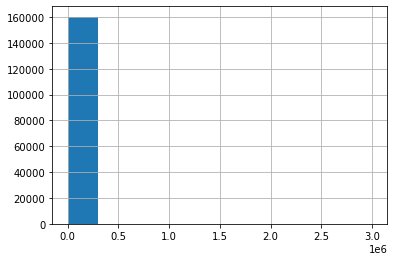

In [68]:
df["engine"] = df["Pojemność skokowa"].map(lambda x: str(x).split("cm3")[0].replace(" ", "")).astype("int")
df["engine"].hist()

In [69]:
def reset_outlires(df, feat, prc=99):
    cut_value = np.percentile(df[feat], prc)
    
    return df[feat].map(lambda x: x if x < cut_value else -1)

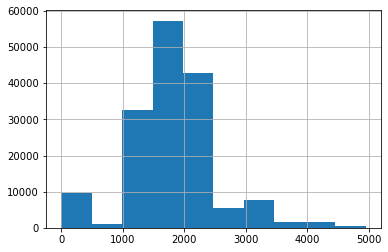

In [70]:
reset_outlires(df, "engine").hist();

df["engine_99"] = reset_outlires(df, "engine")

In [71]:
df["Moc"]

0         110 KM
1         117 KM
2          90 KM
3         160 KM
4          82 KM
           ...  
160245    170 KM
160246     69 KM
160247    105 KM
160251     92 KM
160254    174 KM
Name: Moc, Length: 160257, dtype: object

In [72]:
df["horse_power"] = df["Moc"].map(lambda x: str(x).split("KM")[0].replace(" ", "")).astype("int")

<AxesSubplot:>

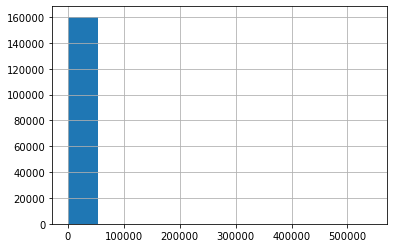

In [73]:
df["horse_power"].hist()

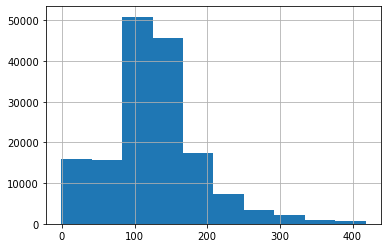

In [74]:
reset_outlires(df, "horse_power").hist();

df["horse_power_99"] = reset_outlires(df, "horse_power")

In [75]:
feats = ["version_year_from_ext",
         "version_year_to_ext",
         "year_production_ext",
         'mileage_ext',
         'engine_capacity_ext',
         'power_ext',
         'voivodeship_cat',
         'postal_code_cat'] + cat_feats + features_cat

feats += ["engine_99", "horse_power_99"]

h.check_log_model(df, feats, xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0))

Final result: (8478.353503381002, 191.09575727906673)


Weight,Feature
0.2268,year_production_ext
0.1242,features_26_cat
0.0953,Skrzynia biegów_cat
0.0761,power_ext
0.0559,features_30_cat
0.0451,features_38_cat
0.0441,features_28_cat
0.0427,Napęd_cat
0.0281,features_24_cat
0.0167,Bezwypadkowy_cat


## Kaggle submit
I zgodnie z tradycją - tworzymy plik do wgrania do Kaggle.

In [50]:
# feats = ["version_year_from_ext",
#          "version_year_to_ext",
#          "year_production_ext",
#          'mileage_ext',
#          'engine_capacity_ext',
#          'power_ext',
#          'voivodeship_cat',
#          'postal_code_cat'] + cat_feats

# df_train = df[ ~df["price_value"].isnull() ].copy()
# df_test = df[ df["price_value"].isnull() ].copy()

# X_train = df_train[feats]
# y_train = df_train["price_value"]
# y_log_train = np.log(y_train)

# X_test = df_test[feats]

# model = xgb.XGBRegressor(max_depth=7, n_estimators=1200, learning_rate=0.1, random_state=0)
# model.fit(X_train, y_log_train)
# y_log_pred = model.predict(X_test)
# y_pred = np.exp(y_log_pred)


# df_test["price_value"] = y_pred
# df_test[ ["id", "price_value"] ].to_csv("../output/xgb_log_year_production_1.csv", index=False)